In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def simulate_evolution(num_generations, n0, zBar0, rMax, k, alpha, theta, sigmaG, num_individuals=100, dt=0.01):
    n = np.zeros(num_generations)
    zBar = np.zeros(num_generations)
    mean_fitness = np.zeros(num_generations)
    trait_values = np.zeros((num_generations, num_individuals))

    # Initialize population size, mean trait value, and individual trait values
    n[0] = n0
    zBar[0] = zBar0
    trait_values[0] = np.random.normal(zBar0, np.sqrt(sigmaG), num_individuals)

    for t in range(1, num_generations):
        r = rMax * (1 - (n[t-1] / k)) - alpha * 0.5 * (trait_values[t-1] - theta)**2
        mean_fitness[t-1] = np.mean(r)

        dn_dt = r * n[t-1]
        total_dn = np.sum(dn_dt)  # Sum the growth rate of all individuals
        n[t] = n[t-1] + total_dn * dt

        dzBar_dt = sigmaG * alpha * (theta - zBar[t-1])
        zBar[t] = zBar[t-1] + dzBar_dt * dt

        # Update individual trait values
        trait_changes = np.random.normal(0, np.sqrt(sigmaG), num_individuals) * dt
        trait_values[t] = trait_values[t-1] + trait_changes

    mean_fitness[-1] = np.mean(rMax * (1 - (n[-1] / k)) - alpha * 0.5 * (trait_values[-1] - theta)**2)

    return mean_fitness, zBar, n, trait_values



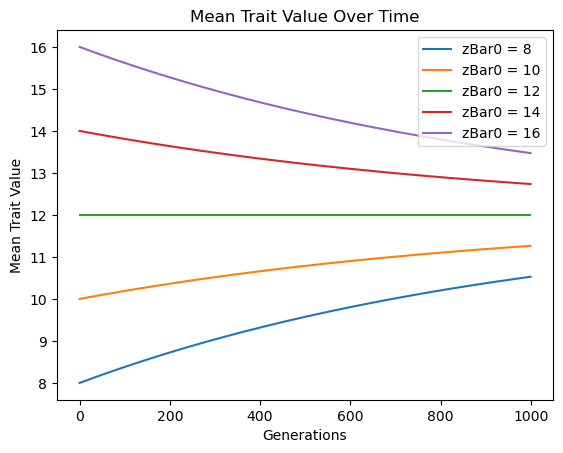

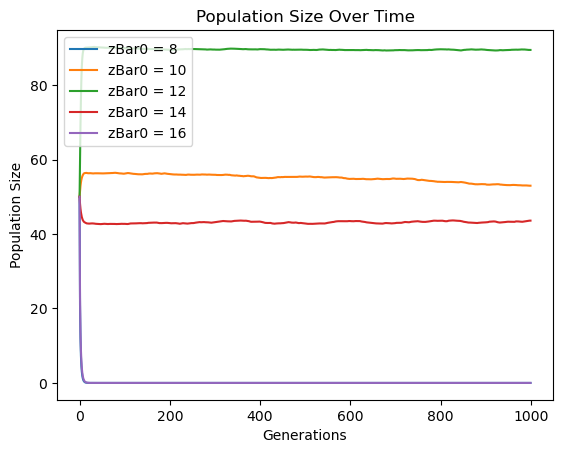

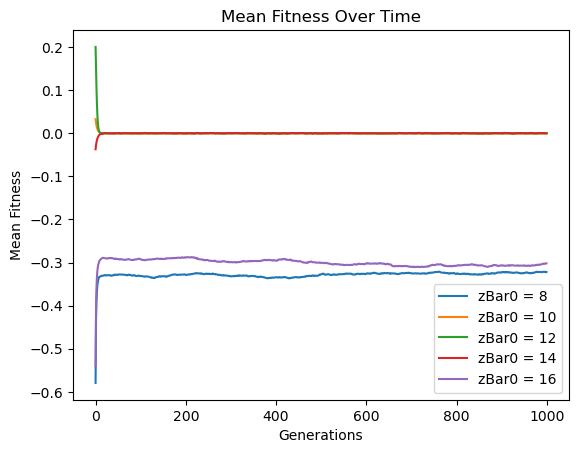

In [41]:
import matplotlib.pyplot as plt

num_generations = 1000
n0 = 50
rMax = 0.5
k = 100
alpha = 0.1
theta = 12
sigmaG = 1
zBar0_values = [8, 10, 12, 14, 16]

for zBar0 in zBar0_values:
    mean_fitness, zBar, n, trait_values = simulate_evolution(num_generations, n0, zBar0, rMax, k, alpha, theta, sigmaG)

    # Plot mean trait value over time
    plt.figure(1)
    plt.plot(zBar, label=f"zBar0 = {zBar0}")

    # Plot population size over time
    plt.figure(2)
    plt.plot(n, label=f"zBar0 = {zBar0}")

    # Plot mean fitness over time
    plt.figure(3)
    plt.plot(mean_fitness, label=f"zBar0 = {zBar0}")

# Customize and display mean trait value plot
plt.figure(1)
plt.title("Mean Trait Value Over Time")
plt.xlabel("Generations")
plt.ylabel("Mean Trait Value")
plt.legend()

# Customize and display population size plot
plt.figure(2)
plt.title("Population Size Over Time")
plt.xlabel("Generations")
plt.ylabel("Population Size")
plt.legend()

# Customize and display mean fitness plot
plt.figure(3)
plt.title("Mean Fitness Over Time")
plt.xlabel("Generations")
plt.ylabel("Mean Fitness")
plt.legend()

plt.show()
